# **Parcours de Graphes BFS - DFS**

## **1. Cours**

Comme les autres structures de données, nous avons souvent besoin de parcourir un graphe.

Ci-contre un graphe non orienté, contenant 8 sommets et 10 arrêtes.


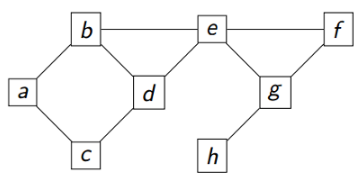

Sa matrice d'adjacence se définit ainsi :


```
matrice = [[0,1,1,0,0,0,0,0],
          [1,0,0,1,1,0,0,0],
          [1,0,0,1,0,0,0,0],
          [0,1,1,0,1,0,0,0],
          [0,1,0,1,0,1,1,0],
          [0,0,0,0,1,0,1,0],
          [0,0,0,0,1,1,0,1],
          [0,0,0,0,0,0,1,0]]
```

Sa liste d'adjacence s'écrit

A : B,C

B : A,D,E

C : A,D

D : B,C,E

E : B,D,F,G

F : E,G

G : E,F,H


Il existe 2 stratégies possibles pour parcourir ce graphe. Elles sont détaillées dans cette vidéo :

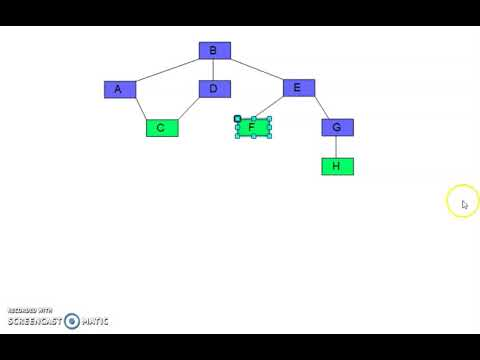

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('5dmCz5Cpy3I')

## **2. Activité débranchée : Recherche en profondeur d'abord**

Pour parcourir le graphes en profondeur d'abord :

    on commence avec un nœud donné (point de départ)
    on explore chaque branche complètement avant de passer à la suivante. Autrement dit, on commence d'abord par aller le plus profond possible.
    Comme pour les arbres, cet algorithme s'écrit naturellement de manière récursive.

Donc, parcourir un graphe en profondeur à partir d’un sommet, consiste à explorer le graphe en suivant un chemin. Lorsqu’on arrive sur un sommet qui n’a plus de voisins non visités, on remonte dans le chemin pour explorer les voisins non visités d’un autre sommet…

**Première version : non récursive**
On utilise une pile (aVoir) et une liste (vus)

Prenons en exemple le graphe montré plus haut :
On dispose

 
*  d’un graphe
*  d'une liste **vus** sommets_visités
*  et d’une pile **aVoir** des sommets à visiter


Algorithme de parcours DFS


*  Le sommet de départ est par exemple ’G’ on ajoute ce sommet de départ dans vus
*   On met dans la pile aVoir tous les voisins de G
*   Puis, tant que aVoir n’est pas vide :



• On récupère le sommet de la pile aVoir dans une variable sommet et on ajoute sommet dans vus

• on empile tous les voisins (non déjà visités et non déjà à voir) de sommet dans aVoir


Voici les contenus des variables au premier tour de la boucle tant que :
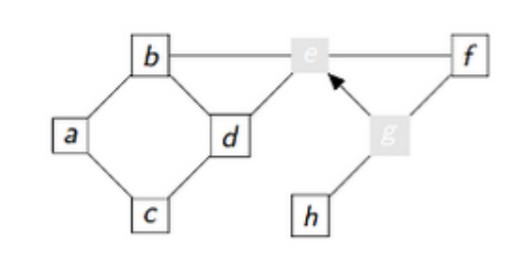

Au début:

sommet = g

aVoir: [h,f,e]

1er tour de la boucle :

sommet=e

vus : [g,e]

aVoir = [h,f,d,b]


Au second tour de la boucle tant que :
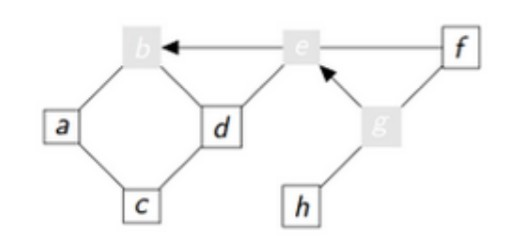

2nd tour

sommet = b

vu = [g,e,b]

aVoir : [h,f,d,a]


Au troisième tour de la boucle tant que :
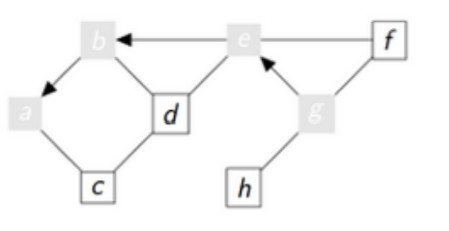

3ème tour

sommet = a

vu = [g,e,b,a]

aVoir : [h,f,d,c]


Au quatrième tour de la boucle tant que :
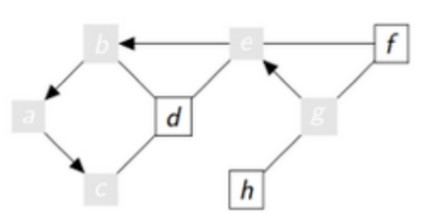

4ème tour

sommet = c

vu = [g,e,b,a,c]

aVoir : [h,f,d]


Au cinqième tour de la boucle tant que :
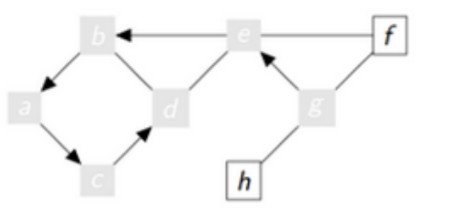

5ème tour

sommet = d

vu = [g,e,b,a,c,d]

aVoir : [h,f]


Au sixième tour de la boucle tant que :
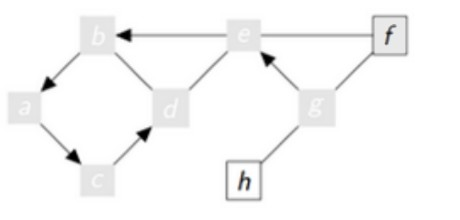

6ème tour

sommet = f

vu = [g,e,b,a,c,d,f]

aVoir : [h]


Au septième tour de la boucle tant que :
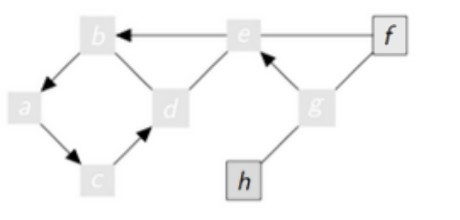

7ème tour

sommet = h

vu = [g,e,b,a,c,d,f,h]

aVoir : []

la boucle s'arrête

	


**la liste aVoir est utilisée comme une PILE. On empile les voisins du sommet que l'on visite, puis on les dépile, c-a-d qu'on repart du dernier sommet empilé. C'est pour cette raison que l'on parcours l'arbre en profondeur, on commence par les voisin du dernier sommet. Si on utilisait aVoir comme une file, on parcourrais en largeur (ce que nous ferons plus loin).**

Voici une représentation schématique du parcours que nous venons de faire, si on représente le graphe avec G en haut, puis par couche selon la distance à G :
Implémentation non récursive de l'algorithme
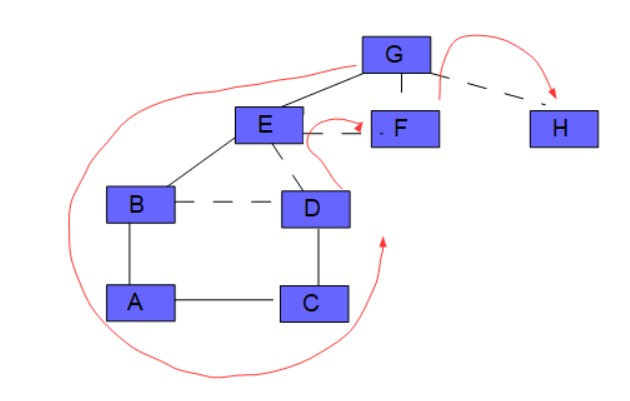

Implémentation non récursive de l'algorithme DFS:



```
Placer le sommet de départ dans vus
Empiler les voisins de ce sommet dans aVoir
tant que aVoir n'est pas vide :
       depiler le prochain sommet
       l'ajouter dans vus
       ajouter ses voisins non vus et non à voir dans aVoir
```




**Exercice 1 :**

Ecrire la fonction DFS qui renvoie la liste des sommets vus (dans l'ordre de visite)
La liste d'adjacence du graphe est modélisée par **lstAdj**, qui contient un dictionnaire.

Voilà son contenu :

lstAdj={'A': ('B', 'C'), 'B': ('A', 'D', 'E'), 'C': ('A', 'D'), 'D': ('B', 'C', 'E'), 'E': ('B', 'D', 'F', 'G'), 'F': ('E', 'G'), 'G': ('E', 'F', 'H'), 'H': 'G'}

In [11]:
lstAdj={'A': ('B', 'C'), 'B': ('A', 'D', 'E'), 'C': ('A', 'D'), 'D': ('B', 'C', 'E'), 'E': ('B', 'D', 'F', 'G'), 'F': ('E', 'G'), 'G': ('E', 'F', 'H'), 'H': 'G'}

def DFS(start : str ) -> list  :
   vus = []
   aVoir = []
   
   vus.append(start)
   for voisin in lstAdj[start]:
      aVoir.append(voisin)
      
   while len(aVoir) > 0:
      next = aVoir.pop()
      if next not in vus:
         vus.append(next)
      for voisin in lstAdj[next]:
         if voisin not in vus:
            aVoir.append(voisin)
      
   return vus


parcours=DFS('A')
print(parcours)

# le résultat attendu du parcours du graphe en profondeur est :
# ['A', 'C', 'D', 'E', 'G', 'H', 'F', 'B']

['A', 'C', 'D', 'E', 'G', 'H', 'F', 'B']


Implémentation récursive de l'algorithme DFS :

```
Placer le sommet de départ dans vus
Empiler les voisins de ce sommet dans aVoir
tant que aVoir n'est pas vide :
       depiler le prochain sommet
       l'ajouter dans vus
       ajouter ses voisins non vus et non à voir dans aVoir
```




**Exercice 2 :**

Ecrire la fonction récursive DFS qui renvoie la liste des sommets vus (dans l'ordre de visite)
La liste d'adjacence du graphe est modélisée par **lstAdj**, qui contient un dictionnaire.

Voilà son contenu :

lstAdj={'A': ('B', 'C'), 'B': ('A', 'D', 'E'), 'C': ('A', 'D'), 'D': ('B', 'C', 'E'), 'E': ('B', 'D', 'F', 'G'), 'F': ('E', 'G'), 'G': ('E', 'F', 'H'), 'H': 'G'}

In [14]:
lstAdj={'A': ('B', 'C'), 'B': ('A', 'D', 'E'), 'C': ('A', 'D'), 'D': ('B', 'C', 'E'), 'E': ('B', 'D', 'F', 'G'), 'F': ('E', 'G'), 'G': ('E', 'F', 'H'), 'H': 'G'}

def DFS(start,vus) :
   if len(vus) == len(lstAdj):
      return vus
   else:
      vus.append(start)
      for voisin in lstAdj[start]:
         if voisin not in vus:
            DFS(voisin,vus)
      return vus

parcours=DFS('A',[])
print(parcours)

# le résultat attendu du parcours du graphe en profondeur est :
# ['A', 'B', 'D', 'C', 'E', 'F', 'G', 'H']

['A', 'B', 'D', 'C', 'E', 'F', 'G', 'H']


## **3. Activité débranchée : Recherche en largeur d'abord**

Algorithme de parcours BFS

    on commence avec un nœud donné (point de départ)
    on ajoute ce sommet dans vus
    on enfile les voisins de ce sommet dans aVoir
    tant que la FILE aVoir n'est pas vide :
    -- on defile le prochain sommet et on l'ajoute dans la liste vus
    -- on enfile ses voisins dans aVoir

Donc, parcourir un graphe en largeur à partir d’un sommet, consiste à explorer le graphe en explorant systématiquement tous les voisins d'un sommet avant de descendre dans la profondeur du graphe.


Voici les contenus des variables au premier tour de la boucle tant que :
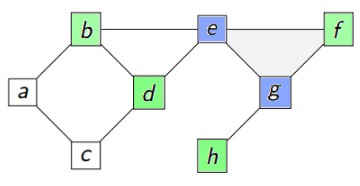

Au début:

sommet = g

aVoir: [e,f,h]

1er tour de la boucle :

sommet=e

vus : [g,e]

aVoir = [f,h,d,b]


Au second tour de la boucle tant que :
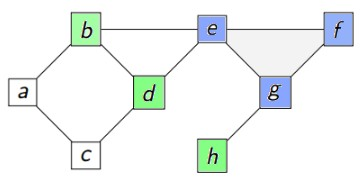

2nd tour

sommet = f

vu = [g,e,f]

aVoir : [h,b,d]


Au troisième tour de la boucle tant que :
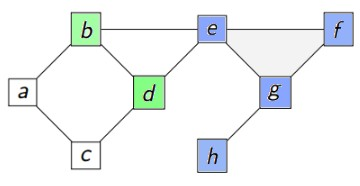
3ème tour

sommet = h

vu = [g,e,f,h]

aVoir : [b,d]


Au quatrième tour de la boucle tant que :
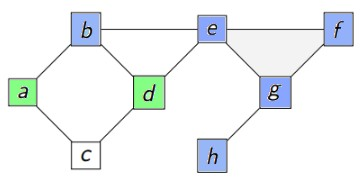
4ème tour

sommet = b

vu = [g,e,f,h,b]

aVoir : [d,a]


Au cinqième tour de la boucle tant que :
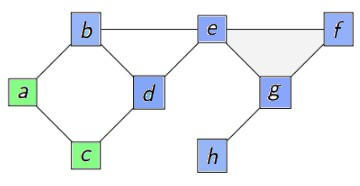
5ème tour

sommet = d

vu = [g,e,f,h,b,d]

aVoir : [a,c]


Au sixième tour de la boucle tant que :
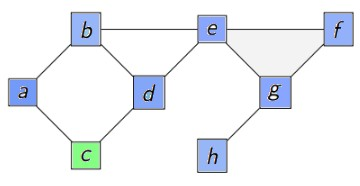
6ème tour

sommet = a

vu = [g,e,f,h,b,d,a]

aVoir : [c]


Au septième tour de la boucle tant que :
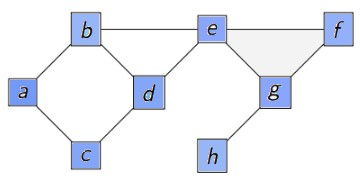
7ème tour

sommet = c

vu = [g,e,f,h,b,d,a,c]

aVoir : []

la boucle s'arrête



la liste **aVoir** est utilisée comme une **FILE**. 
On enfile les voisins du sommet que l'on visite, puis on les défile, c-a-d qu'on repart du premier sommet enfilé.
 C'est pour cette raison que l'on parcours l'arbre en largeur, on commence par les voisins des premier sommets visités.

Voici une représentation schématique du parcours que nous venons de faire, si on représente le graphe avec G en haut, puis par couche selon la distance à G :
Implémentation (non récursive) de l'algorithme BFS
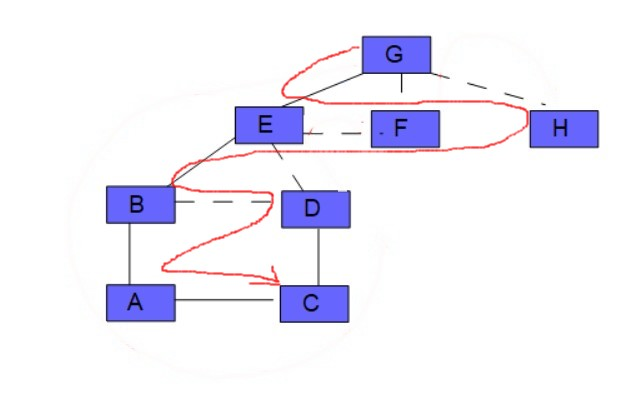

Algorithme :

```
Placer le sommet de départ dans vus
Enfiler les voisins de ce sommet dans aVoir
tant que aVoir n'est pas vide :
       defiler le prochain sommet
       l'ajouter dans vus
       ajouter ses voisins non vus et non à voir dans aVoir
```




**Exercice 3 :**

Ecrire la fonction BFS qui renvoie la liste des sommets vus (dans l'ordre de visite)
La liste d'adjacence du graphe est modélisée par **lstAdj**, qui contient un dictionnaire.

Voilà son contenu :

lstAdj={'A': ('B', 'C'), 'B': ('A', 'D', 'E'), 'C': ('A', 'D'), 'D': ('B', 'C', 'E'), 'E': ('B', 'D', 'F', 'G'), 'F': ('E', 'G'), 'G': ('E', 'F', 'H'), 'H': 'G'}

In [ ]:
lstAdj={'A': ('B', 'C'), 'B': ('A', 'D', 'E'), 'C': ('A', 'D'), 'D': ('B', 'C', 'E'), 'E': ('B', 'D', 'F', 'G'), 'F': ('E', 'G'), 'G': ('E', 'F', 'H'), 'H': 'G'}

def BFS(start : str ) -> list  :
   pass



parcours=BFS('A')
print(parcours)

# le résultat attendu du parcours du graphe en largeur est :
# ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']